In [24]:
import time
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2
from pylab import savefig
import matplotlib.pyplot as plt
#loop if needed
Time = 100000
Ntime = Time + 1
time_s = np.linspace(0, Ntime, num=Ntime, endpoint=False)
array = np.random.rand(Ntime) 
rand_p1K=0.1*(array*2. - 1.)
data_p1K=20.+rand_p1K
print("time (s) : ", time_s)
print("Data with 0.1K random noise (K) : ", data_p1K)

time (s) :  [0.0000e+00 1.0000e+00 2.0000e+00 ... 9.9998e+04 9.9999e+04 1.0000e+05]
Data with 0.1K random noise (K) :  [20.03509813 20.00383254 20.04791509 ... 20.08479301 19.9436808
 19.94407815]


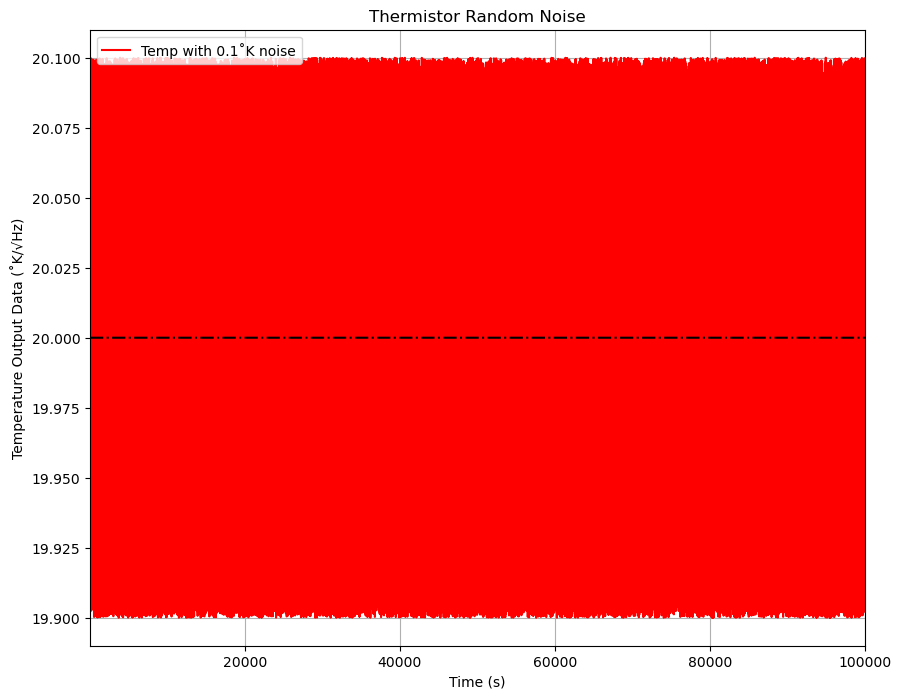

In [25]:
plt.figure(figsize=(10,8))
plt.plot(time_s, data_p1K, 'r-',label = "Temp with 0.1˚K noise")
#plt.yscale("log")
#plt.xscale("log")
plt.xlim(1, Time)
plt.title("Thermistor Random Noise")
plt.xlabel("Time (s)")
plt.ylabel("Temperature Output Data (˚K/√Hz)")
plt.legend()
plt.plot(time_s,np.ones(np.shape(time_s))*20,'k-.')
plt.grid(visible=None, which='major', axis='both')
plt.show()

Absolute Data with 0.1K random noise (K) :  [20.03509813 20.00383254 20.04791509 ... 20.08479301 19.9436808
 19.94407815]
Sorted Data with 0.1K random noise (K) :  [19.9000005  19.90000166 19.90000342 ... 20.09999681 20.09999853
 20.09999944]


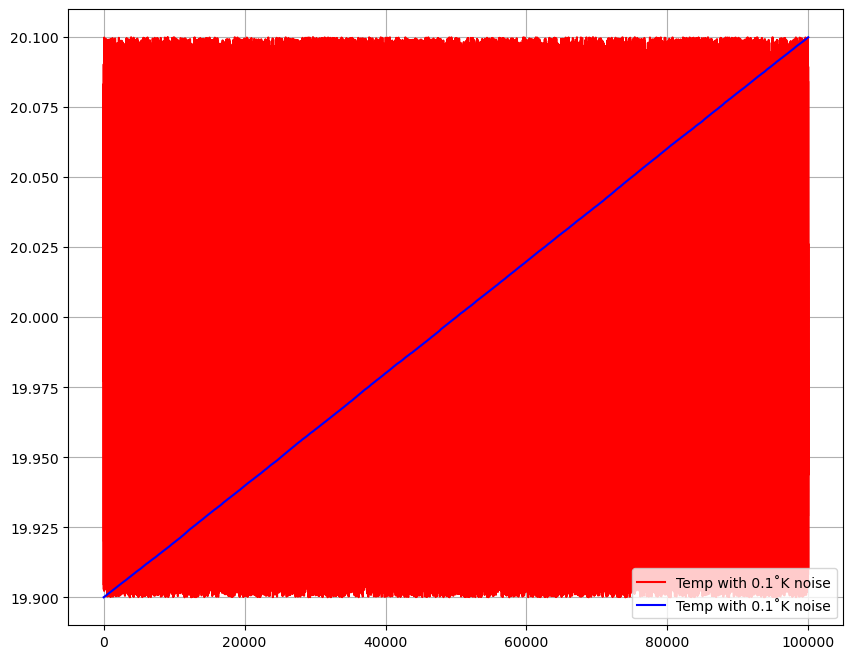

In [26]:
# MEAN TTL
Q0 = np.abs(data_p1K)
X0 = np.sort(Q0)
#F0 = np.array(range(len(Q0)))/float(len(Q0))
print("Absolute Data with 0.1K random noise (K) : ", Q0)
print("Sorted Data with 0.1K random noise (K) : ", X0)
#print("Array Data with 0.1K random noise (K) : ", F0)
plt.figure(figsize=(10,8))
plt.plot(time_s, Q0, 'r-',label = "Temp with 0.1˚K noise")
plt.plot(time_s, X0, 'b-',label = "Temp with 0.1˚K noise")
plt.grid('on')
#
plt.legend()

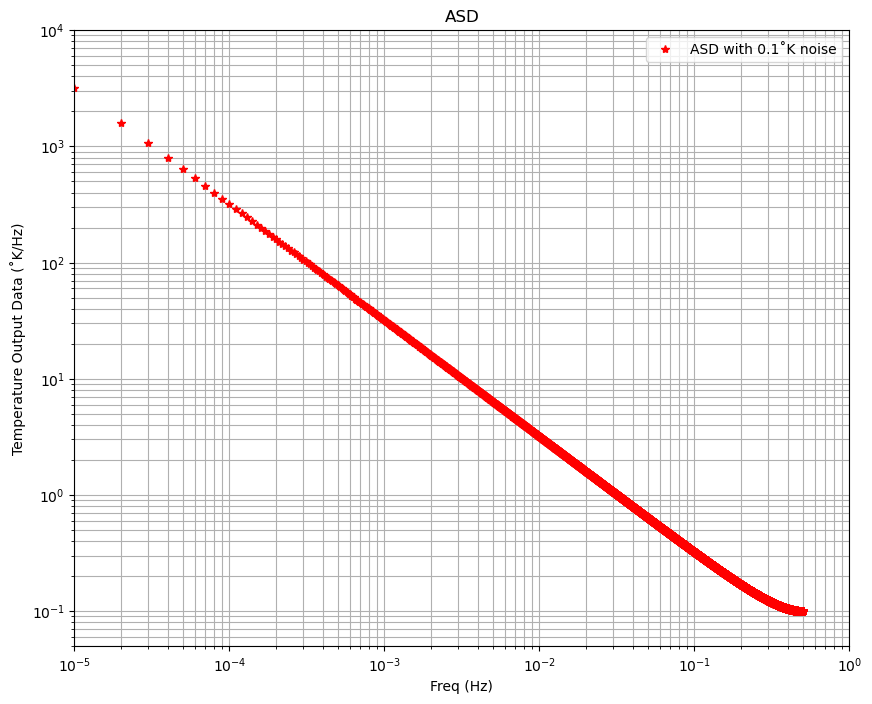

In [30]:
spectrum_p1K = np.fft.fft(X0)  
freq = np.fft.fftfreq(len(spectrum_p1K)) 
plt.figure(figsize=(10,8))
plt.plot(freq, abs(spectrum_p1K), 'r*',label = "ASD with 0.1˚K noise")  
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-5, 1)
plt.ylim(5e-2, 10000)
plt.title("ASD")
plt.xlabel("Freq (Hz)")
plt.ylabel("Temperature Output Data (˚K/Hz)")
plt.legend()
plt.grid(visible=None, which='both', axis='both')
plt.show()

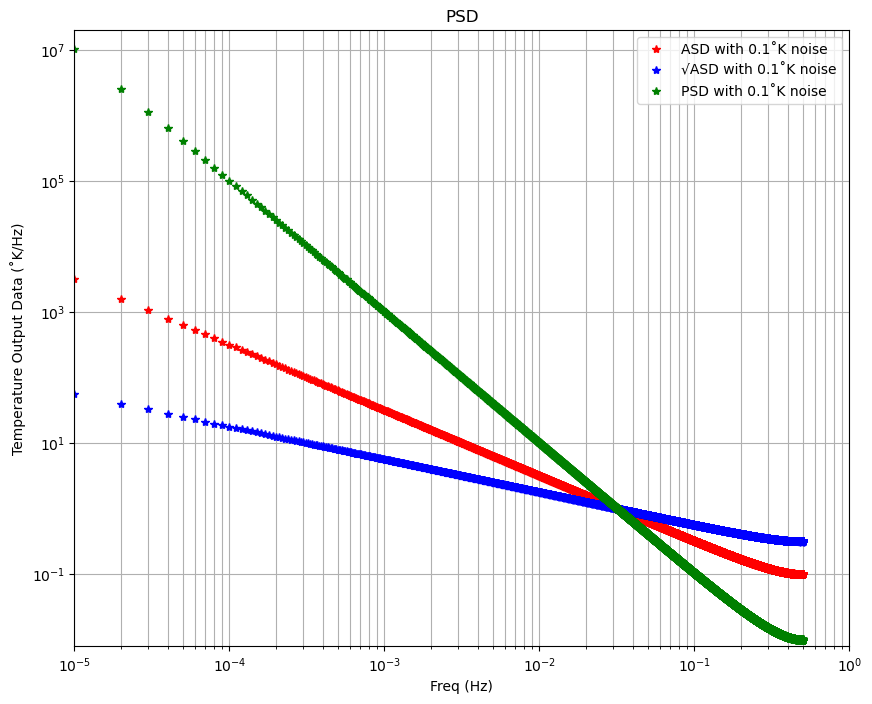

In [32]:
spectrum_p1K = np.fft.fft(X0)
Aspectrum_p1K=spectrum_p1K**0.5
Pspectrum_p1K=spectrum_p1K**2
freq = np.fft.fftfreq(len(spectrum_p1K)) 
Afreq = np.fft.fftfreq(len(Aspectrum_p1K))
Afreq = np.fft.fftfreq(len(Pspectrum_p1K)) 
plt.figure(figsize=(10,8))
plt.plot(freq, abs(spectrum_p1K), 'r*', label = "ASD with 0.1˚K noise")
plt.plot(Afreq, abs(Aspectrum_p1K), 'b*', label = "√ASD with 0.1˚K noise")
plt.plot(Afreq, abs(Pspectrum_p1K), 'g*', label = "PSD with 0.1˚K noise")  
plt.yscale("log")
plt.xscale("log")
plt.xlim(1e-5, 1)
plt.ylim(8e-3, 2e7)
plt.title("PSD")
plt.xlabel("Freq (Hz)")
plt.ylabel("Temperature Output Data (˚K/Hz)")
plt.legend()
plt.grid(visible=None, which='both', axis='both')
plt.show()